<a href="https://colab.research.google.com/github/Dobenkss/Clustering-Analysis-for-Toddler-Nutritional-Status-Segmentation/blob/main/clustering-analysis-for-toddler-nutritional-status-segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================
# import library
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

sns.set(style="whitegrid")

In [ ]:
# ============================================
# load data
# ============================================
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving Status_Gizi_Balita_Jateng_Tahun_2024.csv to Status_Gizi_Balita_Jateng_Tahun_2024.csv


Kabupaten/Kota  Jumlah Balita Ditimbang  \
0       3301 Kab. Cilacap                   106892   
1      3302 Kab. Banyumas                    95468   
2   3303 Kab. Purbalingga                    57631   
3  3304 Kab. Banjarnegara                    52667   
4       3305 Kab. Kebumen                    73895   

   Jumlah Balita Berat Badan Kurang (BB/U)  \
0                                     8956   
1                                    12538   
2                                     6424   
3                                     6020   
4                                     9266   

   Persentase Balita Berat Badan Kurang (BB/U)  \
0                                          8.4   
1                                         13.1   
2                                         11.1   
3                                         11.4   
4                                         12.5   

   Jumlah Balita Diukur Tinggi Badan  Jumlah Balita Pendek (TB/U)  \
0                             106892                         5235   
1                              95468                        14477   
2                              57631                         7114   
3                              52667                         9018   
4                              73895                         6870   

   Persentase Balita Pendek (TB/U)  Jumlah Balita Diukur  \
0                              4.9                106892   
1                             15.2                 95468   
2                             12.3                 57631   
3                             17.1                 52667   
4                              9.3                 73895   

   Jumlah Balita Gizi Kurang  Persentase Balita Gizi Kurang  \
0                       4961                            4.6   
1                       5333                            5.6   
2                       2941                            5.1   
3                       2130                            4.0   
4                       3506                            4.7   

   Jumlah Balita Gizi Buruk  Persentase Balita Gizi Buruk  
0                       427                           0.4  
1                       259                           0.3  
2                       205                           0.4  
3                       169                           0.3  
4                        36                           0.0

In [ ]:
# ============================================
# info dataset
# ============================================

print("Info Dataset\n")
df.info()

Info Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Kabupaten/Kota                               35 non-null     object 
 1   Jumlah Balita Ditimbang                      35 non-null     int64  
 2   Jumlah Balita Berat Badan Kurang (BB/U)      35 non-null     int64  
 3   Persentase Balita Berat Badan Kurang (BB/U)  35 non-null     float64
 4   Jumlah Balita Diukur Tinggi Badan            35 non-null     int64  
 5   Jumlah Balita Pendek (TB/U)                  35 non-null     int64  
 6   Persentase Balita Pendek (TB/U)              35 non-null     float64
 7   Jumlah Balita Diukur                         35 non-null     int64  
 8   Jumlah Balita Gizi Kurang                    35 non-null     int64  
 9   Persentase Balita Gizi Kurang                35 non-null     flo

In [ ]:
# ============================================
# info statistik
# ============================================

df.describe()

Jumlah Balita Ditimbang  Jumlah Balita Berat Badan Kurang (BB/U)  \
count                35.000000                                35.000000   
mean              56231.314286                              6005.371429   
std               25767.915440                              3138.474733   
min                4518.000000                               429.000000   
25%               43416.000000                              4266.500000   
50%               53761.000000                              5711.000000   
75%               74936.000000                              7997.000000   
max              106892.000000                             13008.000000   

       Persentase Balita Berat Badan Kurang (BB/U)  \
count                                    35.000000   
mean                                     10.988571   
std                                       3.119368   
min                                       4.200000   
25%                                       9.200000   
50%                                      11.300000   
75%                                      13.100000   
max                                      17.900000   

       Jumlah Balita Diukur Tinggi Badan  Jumlah Balita Pendek (TB/U)  \
count                          35.000000                    35.000000   
mean                        56231.314286                  5630.228571   
std                         25767.915440                  3746.393490   
min                          4518.000000                   503.000000   
25%                         43416.000000                  2874.500000   
50%                         53761.000000                  5235.000000   
75%                         74936.000000                  7054.000000   
max                        106892.000000                 15750.000000   

       Persentase Balita Pendek (TB/U)  Jumlah Balita Diukur  \
count                        35.000000             35.000000   
mean                         10.077143          56231.314286   
std                           4.249366          25767.915440   
min                           2.500000           4518.000000   
25%                           7.400000          43416.000000   
50%                           9.800000          53761.000000   
75%                          13.100000          74936.000000   
max                          18.200000         106892.000000   

       Jumlah Balita Gizi Kurang  Persentase Balita Gizi Kurang  \
count                  35.000000                      35.000000   
mean                 3080.828571                       5.474286   
std                  1808.763235                       1.771065   
min                   168.000000                       2.200000   
25%                  1837.000000                       3.950000   
50%                  2814.000000                       5.200000   
75%                  3955.000000                       7.050000   
max                  7507.000000                       8.900000   

       Jumlah Balita Gizi Buruk  Persentase Balita Gizi Buruk  
count                 35.000000                     35.000000  
mean                 246.828571                      0.377143  
std                  296.952213                      0.349862  
min                    0.000000                      0.000000  
25%                   47.000000                      0.150000  
50%                  159.000000                      0.300000  
75%                  308.000000                      0.450000  
max                 1091.000000                      1.300000

In [ ]:
# ============================================
# info statistik (4 indikator utama)
# ============================================

df[["Persentase Balita Berat Badan Kurang (BB/U)", "Persentase Balita Pendek (TB/U)", "Persentase Balita Gizi Kurang", "Persentase Balita Gizi Buruk"]].describe()

Persentase Balita Berat Badan Kurang (BB/U)  \
count                                    35.000000   
mean                                     10.988571   
std                                       3.119368   
min                                       4.200000   
25%                                       9.200000   
50%                                      11.300000   
75%                                      13.100000   
max                                      17.900000   

       Persentase Balita Pendek (TB/U)  Persentase Balita Gizi Kurang  \
count                        35.000000                      35.000000   
mean                         10.077143                       5.474286   
std                           4.249366                       1.771065   
min                           2.500000                       2.200000   
25%                           7.400000                       3.950000   
50%                           9.800000                       5.200000   
75%                          13.100000                       7.050000   
max                          18.200000                       8.900000   

       Persentase Balita Gizi Buruk  
count                     35.000000  
mean                       0.377143  
std                        0.349862  
min                        0.000000  
25%                        0.150000  
50%                        0.300000  
75%                        0.450000  
max                        1.300000

In [ ]:
# ============================================
# membersihkan nama kolom
# ============================================

df.columns = df.columns.str.strip()

In [ ]:
# ============================================
# mengidentifikasi nilai null
# ============================================

print("\n=== Jumlah Missing Value per Kolom ===")
print(df.isnull().sum())


=== Jumlah Missing Value per Kolom ===
Kabupaten/Kota                                 0
Jumlah Balita Ditimbang                        0
Jumlah Balita Berat Badan Kurang (BB/U)        0
Persentase Balita Berat Badan Kurang (BB/U)    0
Jumlah Balita Diukur Tinggi Badan              0
Jumlah Balita Pendek (TB/U)                    0
Persentase Balita Pendek (TB/U)                0
Jumlah Balita Diukur                           0
Jumlah Balita Gizi Kurang                      0
Persentase Balita Gizi Kurang                  0
Jumlah Balita Gizi Buruk                       0
Persentase Balita Gizi Buruk                   0
dtype: int64


In [ ]:
# ============================================
# hapus duplikat
# ============================================

df = df.drop_duplicates()

In [ ]:
# ============================================
# pilih variabel fitur
# ============================================

features = [
    "Persentase Balita Berat Badan Kurang (BB/U)",
    "Persentase Balita Pendek (TB/U)",
    "Persentase Balita Gizi Kurang",
    "Persentase Balita Gizi Buruk"
]

X = df[features].copy()

Jumlah data: (35, 12)

Nama Kolom:
 Index(['Kabupaten/Kota', 'Jumlah Balita Ditimbang',
       'Jumlah Balita Berat Badan Kurang (BB/U)',
       'Persentase Balita Berat Badan Kurang (BB/U)',
       'Jumlah Balita Diukur Tinggi Badan', 'Jumlah Balita Pendek (TB/U)',
       'Persentase Balita Pendek (TB/U)', 'Jumlah Balita Diukur',
       'Jumlah Balita Gizi Kurang', 'Persentase Balita Gizi Kurang',
       'Jumlah Balita Gizi Buruk', 'Persentase Balita Gizi Buruk'],
      dtype='object')


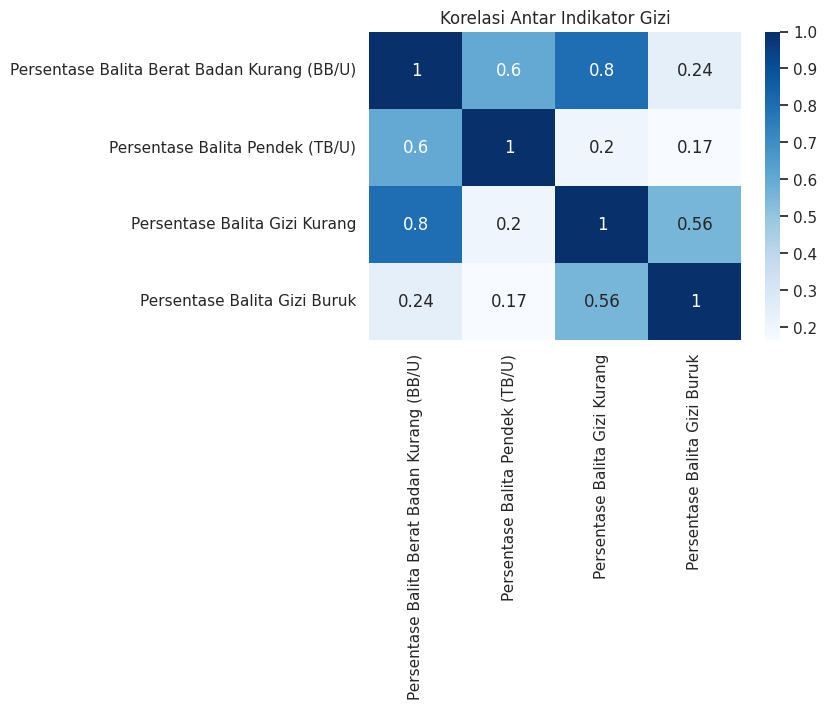

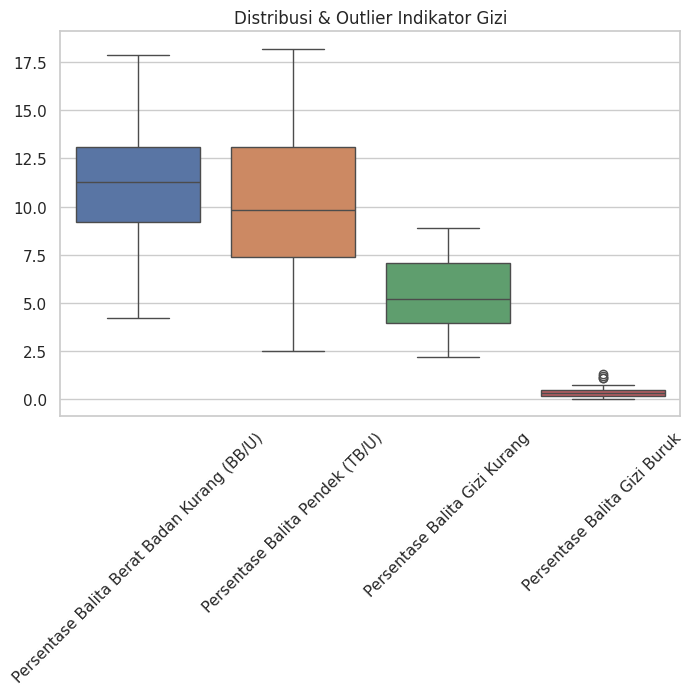

In [ ]:
# ============================
# eda
# ============================

print("Jumlah data:", df.shape)
print("\nNama Kolom:\n", df.columns)

# Statistik deskriptif
df[features].describe()

# Korelasi antar indikator
plt.figure(figsize=(6,4))
sns.heatmap(df[features].corr(), annot=True, cmap="Blues")
plt.title("Korelasi Antar Indikator Gizi")
plt.show()

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(8,5))
sns.boxplot(data=df[features])
plt.xticks(rotation=45)
plt.title("Distribusi & Outlier Indikator Gizi")
plt.show()

In [ ]:
# ============================================
# Scaling
# ============================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# ============================
# menentukan k optimal (k-means)
# ============================

range_k = range(2, 7)
results = []

for k in range_k:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(X_scaled)

    results.append([
        k,
        silhouette_score(X_scaled, labels),
        calinski_harabasz_score(X_scaled, labels),
        davies_bouldin_score(X_scaled, labels)
    ])

eval_k_df = pd.DataFrame(results, columns=["k", "Silhouette", "CH", "DBI"])
eval_k_df

k  Silhouette         CH       DBI
0  2    0.295258  20.500450  1.178674
1  3    0.366700  26.446082  0.974142
2  4    0.372698  26.226828  0.921863
3  5    0.336790  25.912739  0.929244
4  6    0.326475  25.233092  0.875890

In [ ]:
# ============================
# menentukan k optimal (hierarchical)
# ============================

range_k = range(2, 7)
results_h = []

for k in range_k:
    agg = AgglomerativeClustering(
        n_clusters=k,
        linkage='ward'
    )

    labels = agg.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, labels)
    ch  = calinski_harabasz_score(X_scaled, labels)
    db  = davies_bouldin_score(X_scaled, labels)

    results_h.append([k, sil, ch, db])

eval_h_df = pd.DataFrame(
    results_h,
    columns=["k", "Silhouette", "CH", "DBI"]
)

eval_h_df

k  Silhouette         CH       DBI
0  2    0.347944  19.071875  0.903799
1  3    0.347828  23.461067  1.034864
2  4    0.386649  23.975467  0.796681
3  5    0.336796  25.035902  0.950155
4  6    0.342585  23.462423  0.842295

In [ ]:
# ============================================
# fit k-means (k = 3)
# ============================================

kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(X_scaled)

df["Cluster_KMeans"] = kmeans_labels

In [ ]:
# ============================
# Tabel ukuran cluster K-Means
# ============================
cluster_size_kmeans = df["Cluster_KMeans"].value_counts().sort_index()
print("\n=== Ukuran Cluster K-Means (k=3) ===")
print(cluster_size_kmeans)


=== Ukuran Cluster K-Means (k=3) ===
Cluster_KMeans
0     8
1    10
2    17
Name: count, dtype: int64


In [ ]:
# ============================================
# fit hierarchical (k = 3)
# ============================================

agg = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward',
    metric='euclidean'
)

agg_labels = agg.fit_predict(X_scaled)

df["Cluster_Hierarchical"] = agg_labels

In [ ]:
# ============================
# Tabel ukuran cluster Hierarchical
# ============================

cluster_size_hier = df["Cluster_Hierarchical"].value_counts().sort_index()
print("\n=== Ukuran Cluster Hierarchical (k=3) ===")
print(cluster_size_hier)


=== Ukuran Cluster Hierarchical (k=3) ===
Cluster_Hierarchical
0     8
1     8
2    19
Name: count, dtype: int64


In [ ]:
# ============================================
# evaluasi akhir k-means vs hierarchical
# ============================================

def evaluate(labels, data):
    sil = silhouette_score(data, labels)
    ch  = calinski_harabasz_score(data, labels)
    db  = davies_bouldin_score(data, labels)
    return sil, ch, db

km_sil, km_ch, km_db = evaluate(df["Cluster_KMeans"], X_scaled)
ag_sil, ag_ch, ag_db = evaluate(df["Cluster_Hierarchical"], X_scaled)

eval_df = pd.DataFrame({
    "Algoritma": ["K-Means", "Hierarchical-Ward"],
    "Silhouette": [km_sil, ag_sil],
    "Calinski-Harabasz": [km_ch, ag_ch],
    "Davies-Bouldin": [km_db, ag_db]
})

eval_df

Algoritma  Silhouette  Calinski-Harabasz  Davies-Bouldin
0            K-Means    0.366700          26.446082        0.974142
1  Hierarchical-Ward    0.347828          23.461067        1.034864

In [ ]:
cluster_assignment = df[["Kabupaten/Kota", "Cluster_KMeans", "Cluster_Hierarchical"]]
print("\n=== Tabel Assignments ===")
print(cluster_assignment)


=== Tabel Assignments ===
            Kabupaten/Kota  Cluster_KMeans  Cluster_Hierarchical
0        3301 Kab. Cilacap               0                     1
1       3302 Kab. Banyumas               2                     2
2    3303 Kab. Purbalingga               2                     2
3   3304 Kab. Banjarnegara               2                     2
4        3305 Kab. Kebumen               2                     2
5      3306 Kab. Purworejo               2                     2
6       3307 Kab. Wonosobo               2                     2
7       3308 Kab. Magelang               2                     2
8       3309 Kab. Boyolali               2                     2
9         3310 Kab. Klaten               2                     2
10     3311 Kab. Sukoharjo               2                     2
11      3312 Kab. Wonogiri               2                     2
12   3313 Kab. Karanganyar               0                     1
13        3314 Kab. Sragen               2                     

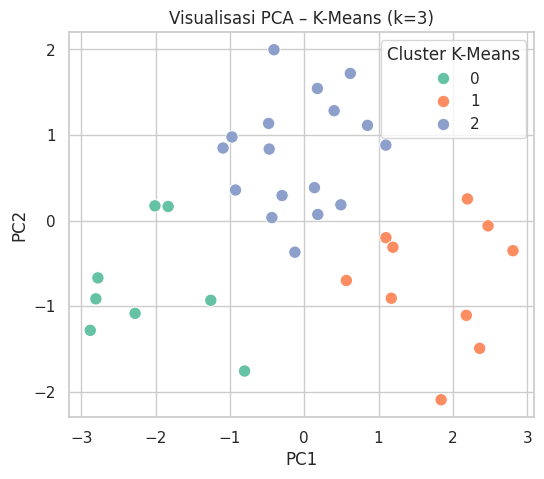

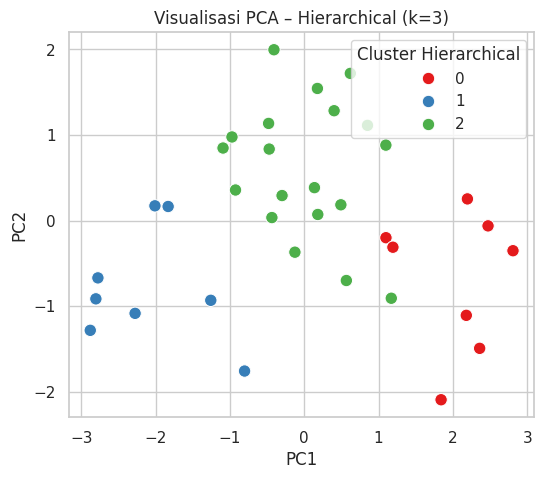

In [ ]:
# ============================================
# visualisasi pca plot (k=3)
# ============================================

# Buat PCA 2 dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

# Plot PCA untuk K-Means
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df,
    x="PCA1", y="PCA2",
    hue="Cluster_KMeans",
    palette="Set2",
    s=80
)
plt.title("Visualisasi PCA – K-Means (k=3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster K-Means")
plt.show()

# Plot PCA untuk Hierarchical
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df,
    x="PCA1", y="PCA2",
    hue="Cluster_Hierarchical",
    palette="Set1",
    s=80
)
plt.title("Visualisasi PCA – Hierarchical (k=3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster Hierarchical")
plt.show()

In [ ]:
# ============================
# label laster otomatis
# ============================

cluster_means = df.groupby("Cluster_KMeans")[features].mean()

# Hitung risk score: semakin tinggi nilainya → semakin berisiko
cluster_means["Risk_Score"] = cluster_means.sum(axis=1)

# Ranking otomatis
cluster_means_sorted = cluster_means.sort_values("Risk_Score")

# Bikin mapping baru
auto_labels = {
    cluster: label
    for cluster, label in zip(
        cluster_means_sorted.index,
        ["Gizi Baik", "Gizi Menengah", "Gizi Buruk"]
    )
}

df["Kategori_KMeans"] = df["Cluster_KMeans"].map(auto_labels)

cluster_means_sorted

Persentase Balita Berat Badan Kurang (BB/U)  \
Cluster_KMeans                                                
0                                                  6.600000   
2                                                 11.364706   
1                                                 13.860000   

                Persentase Balita Pendek (TB/U)  \
Cluster_KMeans                                    
0                                      4.412500   
2                                     12.329412   
1                                     10.780000   

                Persentase Balita Gizi Kurang  Persentase Balita Gizi Buruk  \
Cluster_KMeans                                                                
0                                    3.737500                      0.275000   
2                                    4.952941                      0.211765   
1                                    7.750000                      0.740000   

                Risk_Score  
Cluster_KMeans              
0                15.025000  
2                28.858824  
1                33.130000

In [ ]:
# ============================
# cluster profiling
# ============================

profiling = df.groupby("Kategori_KMeans")[features].agg(['mean','min','max'])
profiling

Persentase Balita Berat Badan Kurang (BB/U)              \
                                                       mean   min   max   
Kategori_KMeans                                                           
Gizi Baik                                          6.600000   4.2   8.8   
Gizi Buruk                                        13.860000  11.1  17.9   
Gizi Menengah                                     11.364706   8.9  14.0   

                Persentase Balita Pendek (TB/U)             \
                                           mean  min   max   
Kategori_KMeans                                              
Gizi Baik                              4.412500  2.5   6.5   
Gizi Buruk                            10.780000  7.3  17.0   
Gizi Menengah                         12.329412  7.5  18.2   

                Persentase Balita Gizi Kurang            \
                                         mean  min  max   
Kategori_KMeans                                           
Gizi Baik                            3.737500  2.2  5.4   
Gizi Buruk                           7.750000  6.4  8.9   
Gizi Menengah                        4.952941  2.9  6.8   

                Persentase Balita Gizi Buruk            
                                        mean  min  max  
Kategori_KMeans                                         
Gizi Baik                           0.275000  0.0  0.7  
Gizi Buruk                          0.740000  0.2  1.3  
Gizi Menengah                       0.211765  0.0  0.4

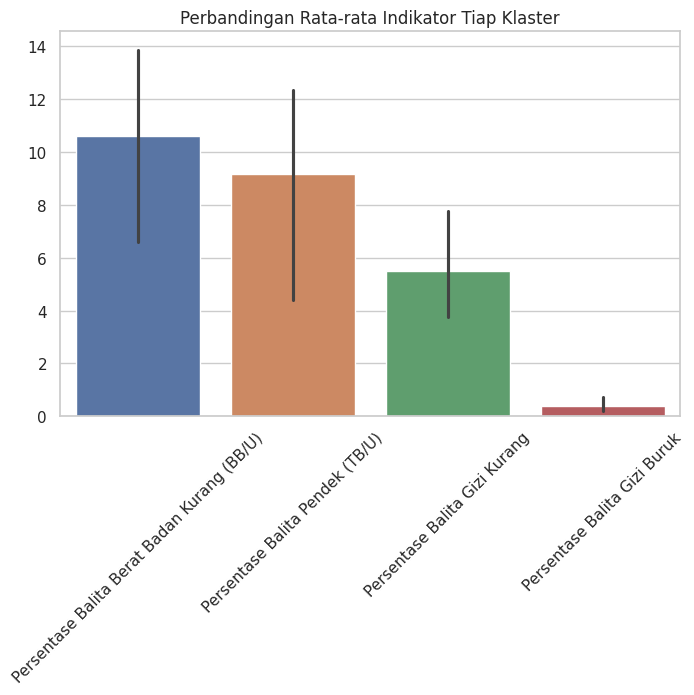

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=cluster_means_sorted[features])
plt.title("Perbandingan Rata-rata Indikator Tiap Klaster")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# ============================
# Analisis Faktor Dominan (PCA Loadings)
# ============================

pca = PCA(n_components=2)
pca.fit(X_scaled)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)

loadings

PC1       PC2
Persentase Balita Berat Badan Kurang (BB/U)  0.592170  0.272769
Persentase Balita Pendek (TB/U)              0.401236  0.659935
Persentase Balita Gizi Kurang                0.576189 -0.308703
Persentase Balita Gizi Buruk                 0.395411 -0.628320

In [ ]:
# ============================
# Deteksi Outlier Kabupaten
# ============================

lof = LocalOutlierFactor(n_neighbors=5)
outlier_labels = lof.fit_predict(X_scaled)

df["Outlier"] = ["Outlier" if x == -1 else "Normal" for x in outlier_labels]
df[df["Outlier"] == "Outlier"]

Empty DataFrame
Columns: [Kabupaten/Kota, Jumlah Balita Ditimbang, Jumlah Balita Berat Badan Kurang (BB/U), Persentase Balita Berat Badan Kurang (BB/U), Jumlah Balita Diukur Tinggi Badan, Jumlah Balita Pendek (TB/U), Persentase Balita Pendek (TB/U), Jumlah Balita Diukur, Jumlah Balita Gizi Kurang, Persentase Balita Gizi Kurang, Jumlah Balita Gizi Buruk, Persentase Balita Gizi Buruk, Cluster_KMeans, Cluster_Hierarchical, PCA1, PCA2, Kategori_KMeans, Outlier]
Index: []

In [ ]:
# ============================
# Tampilkan Seluruh Data + Hasil Klaster
# ============================

df_all = df[[
    "Kabupaten/Kota",
    "Persentase Balita Berat Badan Kurang (BB/U)",
    "Persentase Balita Pendek (TB/U)",
    "Persentase Balita Gizi Kurang",
    "Persentase Balita Gizi Buruk",
    "Cluster_KMeans",
    "Kategori_KMeans",
]].sort_values("Cluster_KMeans")

display(df_all.reset_index(drop=True))


Kabupaten/Kota  Persentase Balita Berat Badan Kurang (BB/U)  \
0        3301 Kab. Cilacap                                          8.4   
1    3313 Kab. Karanganyar                                          8.8   
2          3319 Kab. Kudus                                          5.2   
3       3373 Kota Salatiga                                          7.8   
4          3321 Kab. Demak                                          4.9   
5       3322 Kab. Semarang                                          5.6   
6         3320 Kab. Jepara                                          7.9   
7       3374 Kota Semarang                                          4.2   
8           3318 Kab. Pati                                         11.6   
9         3324 Kab. Kendal                                         13.2   
10       3317 Kab. Rembang                                         16.0   
11        3329 Kab. Brebes                                         13.1   
12      3327 Kab. Pemalang                                         11.1   
13         3328 Kab. Tegal                                         14.0   
14    3326 Kab. Pekalongan                                         12.4   
15         3316 Kab. Blora                                         14.7   
16    3375 Kota Pekalongan                                         14.6   
17         3376 Kota Tegal                                         17.9   
18      3315 Kab. Grobogan                                         10.4   
19      3312 Kab. Wonogiri                                         10.4   
20        3310 Kab. Klaten                                         14.0   
21        3314 Kab. Sragen                                         11.7   
22     3311 Kab. Sukoharjo                                         11.3   
23      3308 Kab. Magelang                                         12.0   
24  3304 Kab. Banjarnegara                                         11.4   
25   3303 Kab. Purbalingga                                         11.1   
26     3306 Kab. Purworejo                                         13.6   
27       3305 Kab. Kebumen                                         12.5   
28    3323 Kab. Temanggung                                         10.4   
29      3309 Kab. Boyolali                                          8.9   
30      3307 Kab. Wonosobo                                         10.3   
31      3302 Kab. Banyumas                                         13.1   
32     3372 Kota Surakarta                                         10.7   
33      3371 Kota Magelang                                          9.5   
34        3325 Kab. Batang                                         11.9   

    Persentase Balita Pendek (TB/U)  Persentase Balita Gizi Kurang  \
0                               4.9                            4.6   
1                               6.0                            3.7   
2                               4.5                            3.5   
3                               6.5                            3.6   
4                               2.5                            3.7   
5                               3.1                            3.2   
6                               4.3                            5.4   
7                               3.5                            2.2   
8                               8.9                            6.4   
9                              11.7                            8.0   
10                             13.6                            7.4   
11                             12.6                            7.6   
12                             10.0                            7.8   
13                             17.0                            7.7   
14                              9.3                            7.3   
15                              7.5                            8.0   
16                              7.3                            8.4   
17                              9.9                

In [ ]:
# Kabupaten paling berisiko
high_risk = df[df["Kategori_KMeans"] == "Gizi Buruk"]
high_risk[["Kabupaten/Kota"] + features]

Kabupaten/Kota  Persentase Balita Berat Badan Kurang (BB/U)  \
15       3316 Kab. Blora                                         14.7   
16     3317 Kab. Rembang                                         16.0   
17        3318 Kab. Pati                                         11.6   
23      3324 Kab. Kendal                                         13.2   
25  3326 Kab. Pekalongan                                         12.4   
26    3327 Kab. Pemalang                                         11.1   
27       3328 Kab. Tegal                                         14.0   
28      3329 Kab. Brebes                                         13.1   
33  3375 Kota Pekalongan                                         14.6   
34       3376 Kota Tegal                                         17.9   

    Persentase Balita Pendek (TB/U)  Persentase Balita Gizi Kurang  \
15                              7.5                            8.0   
16                             13.6                            7.4   
17                              8.9                            6.4   
23                             11.7                            8.0   
25                              9.3                            7.3   
26                             10.0                            7.8   
27                             17.0                            7.7   
28                             12.6                            7.6   
33                              7.3                            8.4   
34                              9.9                            8.9   

    Persentase Balita Gizi Buruk  
15                           0.2  
16                           0.6  
17                           0.6  
23                           1.2  
25                           0.7  
26                           1.3  
27                           1.1  
28                           1.1  
33                           0.2  
34                           0.4

In [ ]:
mapping = {
    "3301 Kab. Cilacap": "Cilacap",
    "3302 Kab. Banyumas": "Banyumas",
    "3303 Kab. Purbalingga": "Purbalingga",
    "3304 Kab. Banjarnegara": "Banjarnegara",
    "3305 Kab. Kebumen": "Kebumen",
    "3306 Kab. Purworejo": "Purworejo",
    "3307 Kab. Wonosobo": "Wonosobo",
    "3308 Kab. Magelang": "Magelang",
    "3309 Kab. Boyolali": "Boyolali",
    "3310 Kab. Klaten": "Klaten",
    "3311 Kab. Sukoharjo": "Sukoharjo",
    "3312 Kab. Wonogiri": "Wonogiri",
    "3313 Kab. Karanganyar": "Karanganyar",
    "3314 Kab. Sragen": "Sragen",
    "3315 Kab. Grobogan": "Grobogan",
    "3316 Kab. Blora": "Blora",
    "3317 Kab. Rembang": "Rembang",
    "3318 Kab. Pati": "Pati",
    "3319 Kab. Kudus": "Kudus",
    "3320 Kab. Jepara": "Jepara",
    "3321 Kab. Demak": "Demak",
    "3322 Kab. Semarang": "Semarang",
    "3323 Kab. Temanggung": "Temanggung",
    "3324 Kab. Kendal": "Kendal",
    "3325 Kab. Batang": "Batang",
    "3326 Kab. Pekalongan": "Pekalongan",
    "3327 Kab. Pemalang": "Pemalang",
    "3328 Kab. Tegal": "Tegal",
    "3329 Kab. Brebes": "Brebes",
    "3371 Kota Magelang": "Kota Magelang",
    "3372 Kota Surakarta": "Surakarta",
    "3373 Kota Salatiga": "Salatiga",
    "3374 Kota Semarang": "Kota Semarang",
    "3375 Kota Pekalongan": "Kota Pekalongan",
    "3376 Kota Tegal": "Kota Tegal"
}

df["Kabupaten_Geo"] = df["Kabupaten/Kota"].map(mapping)

In [ ]:
df[df["Kabupaten_Geo"].isna()]

Empty DataFrame
Columns: [Kabupaten/Kota, Jumlah Balita Ditimbang, Jumlah Balita Berat Badan Kurang (BB/U), Persentase Balita Berat Badan Kurang (BB/U), Jumlah Balita Diukur Tinggi Badan, Jumlah Balita Pendek (TB/U), Persentase Balita Pendek (TB/U), Jumlah Balita Diukur, Jumlah Balita Gizi Kurang, Persentase Balita Gizi Kurang, Jumlah Balita Gizi Buruk, Persentase Balita Gizi Buruk, Cluster_KMeans, Cluster_Hierarchical, PCA1, PCA2, Kategori_KMeans, Outlier, Kabupaten_Geo]
Index: []

In [ ]:
import folium
from folium.plugins import MarkerCluster
import json # Import json to load the geojson file

# load geojson
geojason_path = "Kabupaten-Kota (Provinsi Jawa Tengah).geojson"

# base map
m = folium.Map(location=[-7.3, 110.0], zoom_start=8)

# Read the geojson file to extract centroids
with open(geojason_path, 'r') as f:
    geojson_data = json.load(f)

# Create a dictionary to store centroids {Kabupaten_Geo: [lat, lon]}
centroids = {}
for feature in geojson_data['features']:
    name = feature['properties']['NAME_2']
    if feature['geometry'] and feature['geometry']['type'] == 'Polygon':
        # For simplicity, calculate centroid of the first polygon.
        # For MultiPolygon, more complex calculation might be needed.
        coords = feature['geometry']['coordinates'][0]
        # Calculate approximate centroid
        lat = sum([p[1] for p in coords[0]]) / len(coords[0])
        lon = sum([p[0] for p in coords[0]]) / len(coords[0])
        centroids[name] = [lat, lon]
    elif feature['geometry'] and feature['geometry']['type'] == 'MultiPolygon':
        # Handle MultiPolygon: take centroid of the first polygon
        coords = feature['geometry']['coordinates'][0][0]
        lat = sum([p[1] for p in coords]) / len(coords)
        lon = sum([p[0] for p in coords]) / len(coords)
        centroids[name] = [lat, lon]

# Add 'lat' and 'lon' columns to the DataFrame
df['lat'] = df['Kabupaten_Geo'].map(lambda x: centroids.get(x, [None, None])[0])
df['lon'] = df['Kabupaten_Geo'].map(lambda x: centroids.get(x, [None, None])[1])

# choropleth
folium.Choropleth(
    geo_data=geojson_data, # Use the loaded geojson_data
    data=df,
    columns=["Kabupaten_Geo", "Cluster_KMeans"], # Use Cluster_KMeans
    key_on="feature.properties.NAME_2",
    fill_color="Set2", # Set2 has distinct colors for categories 0,1,2
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Kategori Cluster (K-Means)" # Update legend name
).add_to(m)

# Tambah popup nama kab/kota
# Filter out rows where lat/lon could not be found
df_with_coords = df.dropna(subset=['lat', 'lon'])

for idx, r in df_with_coords.iterrows():
    folium.Marker(
        location=[r["lat"], r["lon"]],
        popup=f"{r['Kabupaten_Geo']} — Kategori: {r['Kategori_KMeans']}" # Use Kategori_KMeans for popup
    ).add_to(m) # Add marker to map

m